In [1]:
import keras 
from keras import layers
import matplotlib.pyplot as plt
import numpy as np, os
import tensorflow as tf

True
Found 1488 images belonging to 2 classes.
Found 495 images belonging to 2 classes.
Found 498 images belonging to 2 classes.


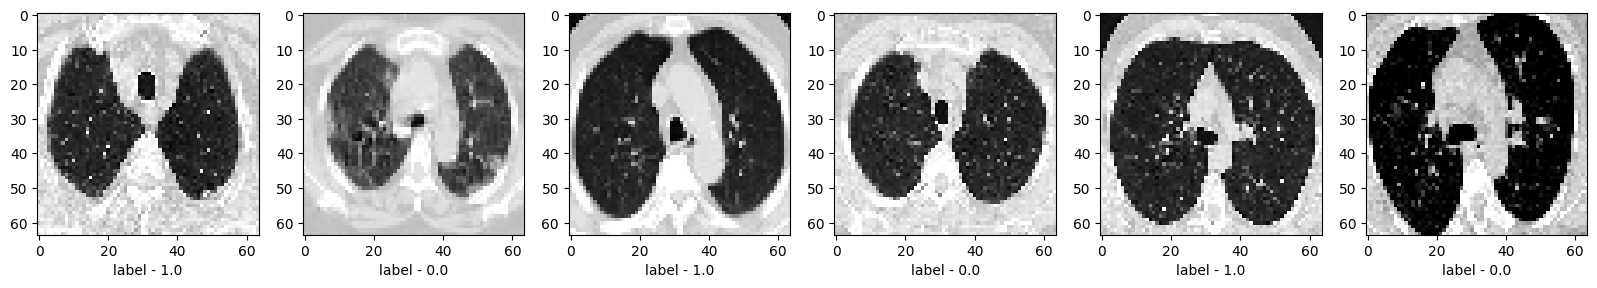

(1488, 64, 64, 1)
(495, 64, 64, 1)
(498, 64, 64, 1)


In [2]:
# loading the tensoboard magic 
%load_ext tensorboard
# loading data 
%run data_input.ipynb
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

In [3]:
# reshaping data - in a vector
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_valid = x_valid.reshape((len(x_valid), np.prod(x_valid.shape[1:])))
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(1488, 4096)
(495, 4096)
(498, 4096)


In [4]:
encoding_dim = 4096
input_layer = keras.Input(shape = (x_train.shape[1], ))
output_layer = layers.Dense(encoding_dim, activation=tf.keras.layers.LeakyReLU(alpha=0.2))(input_layer)
autoencoder = keras.Model(input_layer, output_layer)

In [5]:
encoded_input = keras.Input(shape=(encoding_dim, ))
decoded_output = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoded_output(encoded_input))

In [6]:
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
autoencoder.summary()
decoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4096)]            0         
                                                                 
 dense (Dense)               (None, 4096)              16781312  
                                                                 
Total params: 16,781,312
Trainable params: 16,781,312
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4096)]            0         
                                                                 
 dense (Dense)               (None, 4096)              16781312  
                                                                 
Total params: 16,781,312
Trainab

In [7]:
# If a metric doesn’t change by a minimum delta in a given number of epochs,
# the EarlyStopping callback kills the training process.
cb_earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
#     mode='max',
#     min_delta=0.001,
#     patience=10,
#     verbose=1
    restore_best_weights = True
)
# restore_best_weights: if set to True, the model will get the weights of the epoch
# which has the best value for the monitored metrics;
# otherwise, it will get the weights of the last epoch.

In [8]:
import datetime    
import pytz    
tz_NY = pytz.timezone('Asia/Kolkata')   
logdir = os.path.join("logs", datetime.datetime.now(tz_NY).strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=8,
                shuffle=True,
                validation_data=(x_valid, x_valid),
               callbacks = [cb_earlystop, tensorboard_callback])

Epoch 1/200
186/186 [==============================] - 148s 794ms/step - loss: 0.1651 - val_loss: 0.0541
Epoch 2/200
186/186 [==============================] - 58s 236ms/step - loss: 0.0526 - val_loss: 0.0508


In [10]:
decoded_img = autoencoder.predict(x_test)

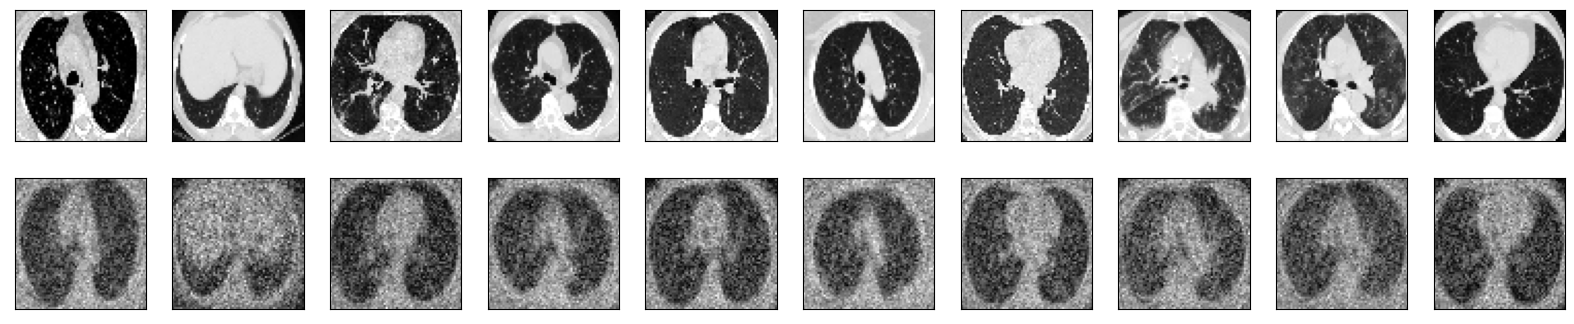

In [11]:
n = 10  # How many digits we will display
start = 50
plt.figure(figsize=(20, 4))
for i in range(start, start+n):
    # Display original
    ax = plt.subplot(2, n, i + 1 - start)
    plt.imshow(x_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n - start)
    plt.imshow(decoded_img[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
%tensorboard --logdir logs